### No9
1. Specify the dataset used here. You need to declare the URL.  
 **toy data from sikit learn**
2. Declare the machine learning problem (such as regression, and classification)  
 **classification**
3. Declare the machine learning algorithms you employ here. Pick up at least three algorithms
and explain the reason(s) why you choose the three algorithms among so many candidates.  
　**Logit, Ridge, DecisionTree　**
4. Declare the software libraries you employ here.  
**sikit learn **  

5. Report the result of the machine learning among three algorithms you employ here. It
should be noted that you have to take care of the way of performance evaluation  
**CV , feature select**


In [26]:

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile, f_regression



cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

"""
#特徴量選定
selector = SelectPercentile( score_func = f_regression, percentile = 30)
selector.fit(X, y)
X = selector.transform(X)
"""


logit = linear_model.LogisticRegression()
ridge = linear_model.RidgeClassifier()
tree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state= 0) 


for model in [tree, logit,  ridge]:

    
    
    score = cross_val_score( model, X, y, cv = 6)
    print( model.__class__.__name__,": {:.3f}".format(score.mean()))
    

DecisionTreeClassifier : 0.932
LogisticRegression : 0.953
RidgeClassifier : 0.960


### No.5

1. Declare machine learning problem within linear binary classification. Use Gaussian kernel
for handling nonlinear separation. Specify the loss function, regularization, respectively.  
 **(you cannnot be changed params below by sklearn)  
 loss: hinge loss function   
 regularization: L2　**
 
2. Implement, and run the ml problem as you declare. Compare the performance of the model
by modifying the size of n, ˜d < n, and α  
 **change n for num of input and alpha  , employ grid search and CV **

In [78]:

import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

seed(5)

def input(n):
    
    """
    toy data 1 for python
    """

    x = 3 * (rand( n, 2) - 0.5)
    #np.cov(x.T)
    #print( x)
    radius = [x[:,0]**2 + x[:,1]**2]
    y = 2 * ( (radius > 0.7 + 0.1 * randn(n)) & (radius < 2.2 + 0.1 * randn(n))) - 1

    """
    y1 = [i for i in range(n) if y[0,i] == 1]
    y2 = [i for i in range(n) if y[0,i] == -1]
    
    plt.scatter(x[y1,0], x[y1,1], color = 'r')
    plt.scatter(x[y2,0], x[y2,1], color = 'b')
    """
    
    
    return x, y 



    
if __name__ == '__main__':
    
    params = [{ 'gamma':np.logspace(-2, 2, 100)}]
    n = []
    gamma_200 = []
    score = []
    score_200 = []
    for i in range(20,210,10):

        data = input(i)

        X = data[0]
        y = np.reshape(data[1].T, (-1))

        #print(X.shape,y.shape)
        
        model = SVC( kernel = "rbf", C = 1)
        #estimators = [ ("pca", pca), ("svm",model)]
        
        clf = GridSearchCV( model, params, cv = 6)
        clf.fit(X, y)
        print( "n:{}, gamma:{:.3f} ,best score:{:.3f}".format(i,clf.best_estimator_.gamma, clf.best_score_))
        np.array(n.append(i))
        np.array(score.append(clf.best_score_))
        
        if i == 200:
            for params, mean_score, scores in clf.grid_scores_:
                gamma_200.append(params)
                score_200.append(mean_score)

n:20, gamma:6.734 ,best score:0.650
n:30, gamma:4.229 ,best score:0.800
n:40, gamma:39.442 ,best score:0.750
n:50, gamma:17.074 ,best score:0.840
n:60, gamma:1.262 ,best score:0.800
n:70, gamma:2.915 ,best score:0.786
n:80, gamma:2.009 ,best score:0.800
n:90, gamma:8.111 ,best score:0.933
n:100, gamma:4.642 ,best score:0.860
n:110, gamma:2.915 ,best score:0.882
n:120, gamma:11.768 ,best score:0.792
n:130, gamma:8.902 ,best score:0.892
n:140, gamma:2.656 ,best score:0.900
n:150, gamma:3.511 ,best score:0.880
n:160, gamma:4.229 ,best score:0.912
n:170, gamma:6.734 ,best score:0.929
n:180, gamma:3.511 ,best score:0.883
n:190, gamma:10.723 ,best score:0.874
n:200, gamma:2.420 ,best score:0.890


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [79]:
import pandas as pd
print(score_200)

df_gamma_200 = pd.DataFrame( gamma_200)
print( df_gamma_200)

[0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.57, 0.565, 0.56, 0.56, 0.56, 0.555, 0.555, 0.555, 0.54, 0.545, 0.57, 0.595, 0.64, 0.66, 0.735, 0.785, 0.805, 0.815, 0.82, 0.83, 0.83, 0.835, 0.845, 0.85, 0.86, 0.86, 0.87, 0.875, 0.865, 0.87, 0.88, 0.88, 0.885, 0.89, 0.885, 0.89, 0.885, 0.88, 0.89, 0.89, 0.885, 0.885, 0.88, 0.88, 0.87, 0.865, 0.87, 0.875, 0.88, 0.88, 0.885, 0.885, 0.885, 0.885, 0.88, 0.875, 0.865, 0.865, 0.86, 0.865, 0.87, 0.865, 0.86, 0.86, 0.85, 0.85, 0.855, 0.85, 0.815, 0.805, 0.785, 0.77, 0.77, 0.76]
         gamma
0     0.010000
1     0.010975
2     0.012045
3     0.013219
4     0.014508
5     0.015923
6     0.017475
7     0.019179
8     0.021049
9     0.023101
10    0.025354
11    0.027826
12    0.030539
13    0.033516
14    0.036784
15    0.040370
16    0.044306
17    0.048626
18    0.053367
19    0.058570
20    0.064281
21    0.070548
22    0.077426
23   

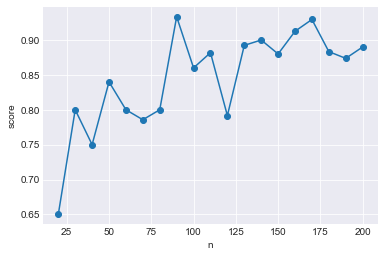

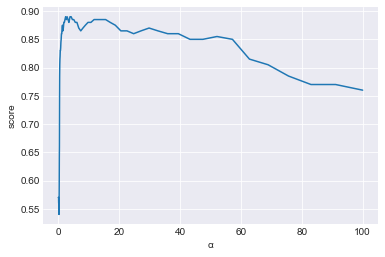

In [80]:
import seaborn as sns
sns.set_style( "darkgrid")

plt.figure()
plt.xlabel( "n")
plt.ylabel("score")
plt.plot( n, score, "o-")

plt.figure()
plt.xlabel("α")
plt.ylabel("score")
plt.plot(df_gamma_200, score_200)
plt.show()